In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings
from pathlib import Path
warnings.filterwarnings('ignore')

# Configure Plotly for both HTML and PNG export
pio.kaleido.scope.mathjax = None  # Disable MathJax for faster PNG export

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create results directories
results_dir = Path('../RESULTS')
figures_dir = results_dir / 'figures'
data_dir = results_dir / 'processed_data'

for directory in [results_dir, figures_dir, data_dir]:
    directory.mkdir(exist_ok=True)

print("Libraries loaded successfully")
print("Plotly configured for both HTML and PNG export")

Libraries loaded successfully
Plotly configured for both HTML and PNG export


In [2]:
# Helper function to save plots in both formats
def save_plotly_figure(fig, filename_base, show_fig=True):
    """Save Plotly figure as both HTML and PNG"""
    try:
        # Save as HTML (interactive)
        fig.write_html(figures_dir / f'{filename_base}.html')
        
        # Save as PNG (static)
        fig.write_image(figures_dir / f'{filename_base}.png', 
                       width=1200, height=800, scale=2)
        
        print(f"Saved {filename_base} as both HTML and PNG")
    except Exception as e:
        print(f"Warning: Could not save PNG for {filename_base}: {e}")
        # Still save HTML even if PNG fails
        fig.write_html(figures_dir / f'{filename_base}.html')
        print(f"Saved {filename_base} as HTML only")
    
    if show_fig:
        fig.show()

print("Plot helper function ready")

Plot helper function ready


## Dataset Loading and Overview

In [3]:
# Load main datasets
branded_df = pd.read_csv("../DATA/branded_food.csv")
nutrient_df = pd.read_csv("../DATA/food_nutrient.csv")
nutrient_ref = pd.read_csv("../DATA/nutrient.csv")

print(f"Branded Foods Dataset Shape: {branded_df.shape}")
print(f"Food Nutrients Dataset Shape: {nutrient_df.shape}")
print(f"Nutrient Reference Dataset Shape: {nutrient_ref.shape}")

# Memory usage
branded_memory = branded_df.memory_usage(deep=True).sum() / 1024**2
nutrient_memory = nutrient_df.memory_usage(deep=True).sum() / 1024**2

print(f"\nMemory Usage:")
print(f"   Branded Foods: {branded_memory:.1f} MB")
print(f"   Food Nutrients: {nutrient_memory:.1f} MB")

Branded Foods Dataset Shape: (1977398, 21)
Food Nutrients Dataset Shape: (25652681, 11)
Nutrient Reference Dataset Shape: (477, 5)

Memory Usage:
   Branded Foods: 2378.1 MB
   Food Nutrients: 2152.9 MB

Memory Usage:
   Branded Foods: 2378.1 MB
   Food Nutrients: 2152.9 MB


In [4]:
# Data types and basic info
print("BRANDED FOODS DATASET STRUCTURE")
print("=" * 50)
branded_df.info()

print("\nColumn Descriptions:")
for col in branded_df.columns:
    non_null = branded_df[col].notna().sum()
    null_pct = (branded_df[col].isna().sum() / len(branded_df)) * 100
    print(f"  {col:25s}: {non_null:,} non-null ({null_pct:5.1f}% missing)")

BRANDED FOODS DATASET STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977398 entries, 0 to 1977397
Data columns (total 21 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   fdc_id                       int64  
 1   brand_owner                  object 
 2   brand_name                   object 
 3   subbrand_name                object 
 4   gtin_upc                     object 
 5   ingredients                  object 
 6   not_a_significant_source_of  object 
 7   serving_size                 float64
 8   serving_size_unit            object 
 9   household_serving_fulltext   object 
 10  branded_food_category        object 
 11  data_source                  object 
 12  package_weight               object 
 13  modified_date                object 
 14  available_date               object 
 15  market_country               object 
 16  discontinued_date            object 
 17  preparation_state_code       object 
 18  trade_chan

## Missing Data Analysis

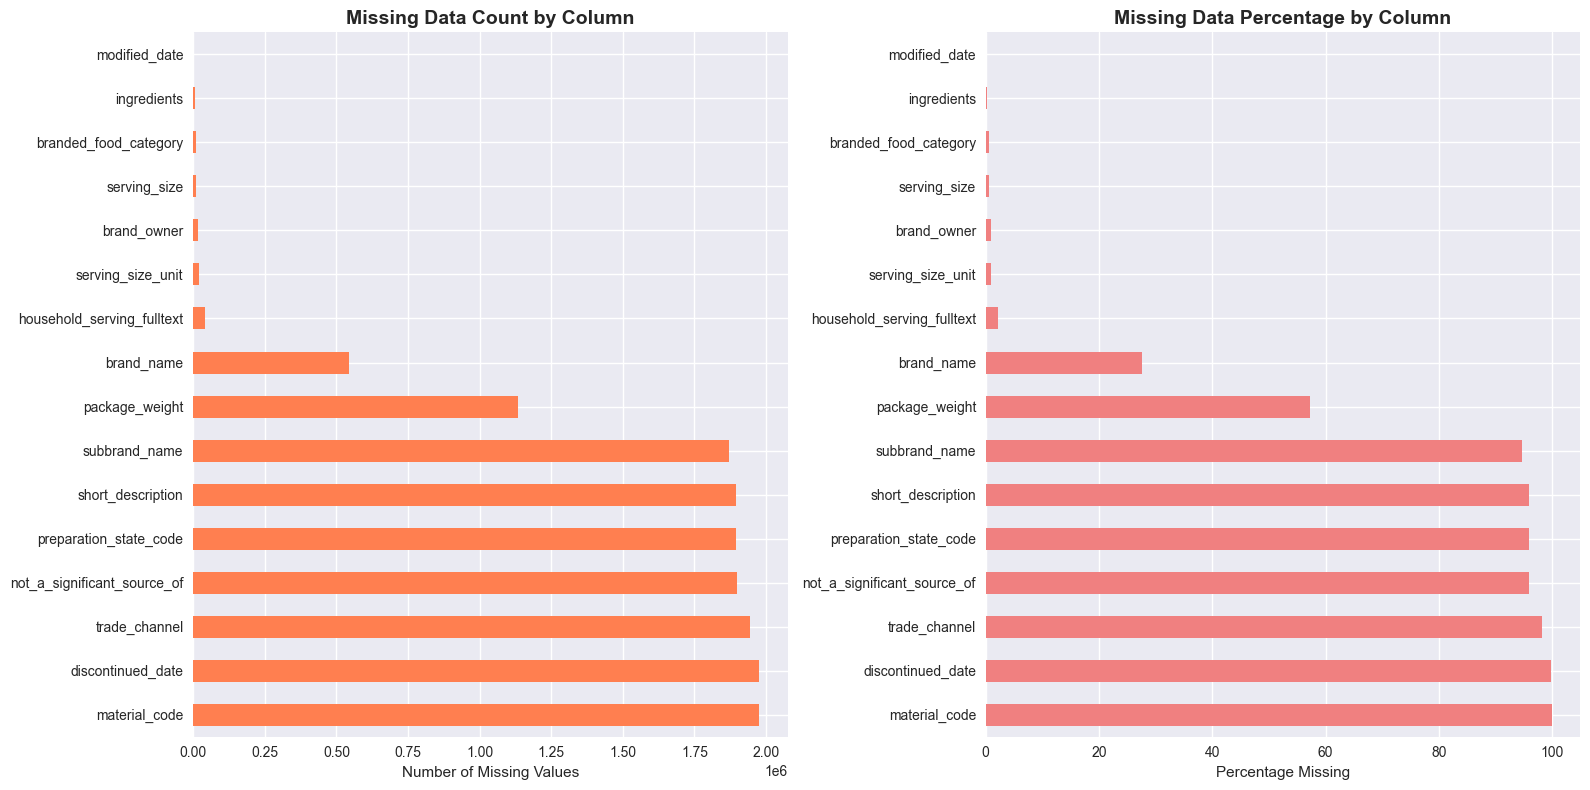


 Missing Data Summary:
   Columns with missing data: 16
   Most missing column: material_code (99.9%)
   Least missing column: modified_date (0.0%)


In [5]:
# Missing data visualization
missing_data = branded_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data / len(branded_df)) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Missing data count
missing_data[missing_data > 0].plot(kind='barh', ax=ax1, color='coral')
ax1.set_title('Missing Data Count by Column', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Missing Values')

# Missing data percentage
missing_percent[missing_percent > 0].plot(kind='barh', ax=ax2, color='lightcoral')
ax2.set_title('Missing Data Percentage by Column', fontsize=14, fontweight='bold')
ax2.set_xlabel('Percentage Missing')

plt.tight_layout()
plt.savefig(figures_dir / 'missing_data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Summary statistics
print("\n Missing Data Summary:")
print(f"   Columns with missing data: {(missing_data > 0).sum()}")
print(f"   Most missing column: {missing_data.index[0]} ({missing_percent.iloc[0]:.1f}%)")
print(f"   Least missing column: {missing_data[missing_data > 0].index[-1]} ({missing_percent[missing_data > 0].iloc[-1]:.1f}%)")

## Brand & Category Analysis

In [6]:
# Top brands analysis
top_brands = branded_df['brand_owner'].value_counts().head(20)

# Interactive plot with Plotly
fig = px.bar(
    x=top_brands.values,
    y=top_brands.index,
    orientation='h',
    title="Top 20 Brands by Number of Products",
    labels={'x': 'Number of Products', 'y': 'Brand'},
    color=top_brands.values,
    color_continuous_scale='Viridis'
)
fig.update_layout(height=600, showlegend=False)

# Save in both formats
save_plotly_figure(fig, 'top_brands_analysis')

print(f"\n Brand Statistics:")
print(f"   Total unique brands: {branded_df['brand_owner'].nunique():,}")
print(f"   Top brand: {top_brands.index[0]} ({top_brands.iloc[0]:,} products)")
print(f"   Average products per brand: {branded_df['brand_owner'].value_counts().mean():.1f}")

Saved top_brands_analysis as both HTML and PNG



 Brand Statistics:
   Total unique brands: 37,032
   Top brand: Wal-Mart Stores, Inc. (46,915 products)
   Average products per brand: 52.9


In [7]:
# Food categories analysis
top_categories = branded_df['branded_food_category'].value_counts().head(15)

# Create pie chart
fig = px.pie(
    values=top_categories.values,
    names=top_categories.index,
    title="Top 15 Food Categories Distribution"
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(height=600)

# Save in both formats
save_plotly_figure(fig, 'food_categories_distribution')

print(f"\n Category Statistics:")
print(f"   Total unique categories: {branded_df['branded_food_category'].nunique():,}")
print(f"   Most common category: {top_categories.index[0]} ({top_categories.iloc[0]:,} products)")

Saved food_categories_distribution as both HTML and PNG



 Category Statistics:
   Total unique categories: 447
   Most common category: Popcorn, Peanuts, Seeds & Related Snacks (91,619 products)


## Ingredients Analysis Preview

In [8]:
# Basic ingredients analysis
ingredients_available = branded_df['ingredients'].notna().sum()
ingredients_missing = branded_df['ingredients'].isna().sum()

print(f" Ingredients Data Availability:")
print(f"   Products with ingredients: {ingredients_available:,} ({ingredients_available/len(branded_df)*100:.1f}%)")
print(f"   Products missing ingredients: {ingredients_missing:,} ({ingredients_missing/len(branded_df)*100:.1f}%)")

# Sample ingredients (first few non-null)
sample_ingredients = branded_df[branded_df['ingredients'].notna()]['ingredients'].head(5)
print("\n Sample Ingredients Lists:")
for i, ing in enumerate(sample_ingredients, 1):
    print(f"   {i}. {ing[:100]}{'...' if len(ing) > 100 else ''}")

 Ingredients Data Availability:
   Products with ingredients: 1,972,025 (99.7%)
   Products missing ingredients: 5,373 (0.3%)

 Sample Ingredients Lists:
   1. Vegetable Oil
   2. INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2% OF: MIREPOIX (CARROTS, CELERY, ONIONS), SALT, NATURAL...
   3. INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREAM, VEGETABLE OIL (CORN, CANOLA, AND/OR SOYBEAN), CELER...
   4. INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, VEGETABLE OIL (CORN, CANOLA, AND/OR SOYBEAN), MODIFIED ...
   5. INGREDIENTS: CHICKEN STOCK, CONTAINS LESS THAN 2% OF: YEAST EXTRACT, DEHYDRATED CHICKEN, NATURAL FLA...

 Sample Ingredients Lists:
   1. Vegetable Oil
   2. INGREDIENTS: BEEF STOCK, CONTAINS LESS THAN 2% OF: MIREPOIX (CARROTS, CELERY, ONIONS), SALT, NATURAL...
   3. INGREDIENTS: CLAM STOCK, POTATOES, CLAMS, CREAM, VEGETABLE OIL (CORN, CANOLA, AND/OR SOYBEAN), CELER...
   4. INGREDIENTS: WATER, CREAM, BROCCOLI, CELERY, VEGETABLE OIL (CORN, CANOLA, AND/OR SOYBEAN), MODIFIED ...
   5. IN

## Nutritional Data Overview

In [9]:
# Key nutrients analysis
key_nutrients = {
    1003: 'Protein',
    1004: 'Total Fat',
    1005: 'Carbohydrates',
    1008: 'Energy (Calories)',
    1093: 'Sodium',
    1079: 'Fiber'
}

# Get nutrient data for key nutrients
key_nutrient_data = nutrient_df[nutrient_df['nutrient_id'].isin(key_nutrients.keys())]

print(f"Nutritional Data Overview:")
print(f"   Total nutrient records: {len(nutrient_df):,}")
print(f"   Unique nutrients tracked: {nutrient_df['nutrient_id'].nunique():,}")
print(f"   Products with nutrition data: {nutrient_df['fdc_id'].nunique():,}")

# Coverage for key nutrients
print("\n Key Nutrient Coverage:")
for nutrient_id, name in key_nutrients.items():
    count = len(key_nutrient_data[key_nutrient_data['nutrient_id'] == nutrient_id])
    print(f"   {name:15s}: {count:,} products")

Nutritional Data Overview:
   Total nutrient records: 25,652,681
   Unique nutrients tracked: 110
   Unique nutrients tracked: 110
   Products with nutrition data: 1,873,698

 Key Nutrient Coverage:
   Products with nutrition data: 1,873,698

 Key Nutrient Coverage:
   Protein        : 1,861,719 products
   Total Fat      : 1,840,594 products
   Protein        : 1,861,719 products
   Total Fat      : 1,840,594 products
   Carbohydrates  : 1,852,738 products
   Energy (Calories): 1,841,010 products
   Carbohydrates  : 1,852,738 products
   Energy (Calories): 1,841,010 products
   Sodium         : 1,847,798 products
   Fiber          : 1,568,179 products
   Sodium         : 1,847,798 products
   Fiber          : 1,568,179 products


## Temporal Analysis

In [10]:
# Convert date columns
date_columns = ['modified_date', 'available_date', 'discontinued_date']
for col in date_columns:
    if col in branded_df.columns:
        branded_df[col] = pd.to_datetime(branded_df[col], errors='coerce')

# Products by year (using available_date)
if 'available_date' in branded_df.columns:
    branded_df['year_available'] = branded_df['available_date'].dt.year
    yearly_products = branded_df['year_available'].value_counts().sort_index()
    
    # Plot temporal trends
    fig = px.line(
        x=yearly_products.index,
        y=yearly_products.values,
        title="Number of Products by Year Available",
        labels={'x': 'Year', 'y': 'Number of Products'}
    )
    fig.update_layout(height=400)
    
    # Save in both formats
    save_plotly_figure(fig, 'products_by_year')
    
    print(f" Temporal Data Overview:")
    print(f"   Date range: {branded_df['available_date'].min()} to {branded_df['available_date'].max()}")
    print(f"   Peak year: {yearly_products.idxmax()} ({yearly_products.max():,} products)")

Saved products_by_year as both HTML and PNG


 Temporal Data Overview:
   Date range: 2019-04-01 00:00:00 to 2025-04-24 00:00:00
   Peak year: 2021 (998,120 products)


## EDA Summary & Next Steps

### Key Findings:
1. **Dataset Size**: Large-scale dataset with 600k+ branded food products
2. **Data Quality**: Varying levels of completeness across fields
3. **Brand Distribution**: Highly concentrated with top brands dominating
4. **Categories**: Diverse food categories with clear market segments
5. **Nutritional Coverage**: Comprehensive nutrition data available

### Recommendations for Feature Engineering:
1. **Ingredient Processing**: Clean and standardize ingredient lists
2. **Nutritional Scoring**: Develop health scores based on nutrients
3. **Brand Analysis**: Create brand reputation features
4. **Temporal Features**: Extract trends and seasonal patterns
5. **Category Encoding**: Develop category-specific features

**Next Notebook**: `02_Preprocessing.ipynb` - Data cleaning and preparation